In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/My Drive'


 20190110_172751.jpg
 4004588.pdf
'43 (1).jpg'
 43.jpg
 9.jpg
'abd cep'
 Abdullah1.gslides
'achievement videos.mp4'
'AIC WB FINAL_obe.doc'
'Areej cep'
'assignment 1.pdf'
'Audio files'
 Book1.xlsx
 Camera
'Camera a'
'CEP (1).pdf'
 CEP.pdf
'Chemistry 7e c.2012 - Silberberg, Amateis.pdf'
'CNIC(front) (1).jpg'
'CNIC(front).jpg'
'Colab Notebooks'
'Contact Information.gform'
'Cover Letter.pdf'
'CS prints (1).docx'
'CS prints.docx'
'CV(WARDAH).docx.pdf'
'Dependent CNIC.pdf'
 DOC-20181021-WA0029.pdf
 Download
'Due Date.pdf'
'el sessional dsa.xlsx'
'EM lab manual.doc'
 englsh.pptx
'Event Feedback.gform'
 Facebook
'Facebook mine'
 fariha
'fb mine'
'Fb mine'
'GBWhatsApp Images'
'Getting started.pdf'
 giphy.gif
 hafsa
 hebaPIAIC.pdf
'HEC (1).jpg'
 HEC.jpg
 IMG-20181013-WA0004.jpg
'IMG-20181013-WA0004 - Wardah Arshad (1).jpg'
'IMG-20181013-WA0004 - Wardah Arshad.jpg'
 IMG-20181215-WA0045~2.jpg
'IMG-20181215-WA0045~2 - Wardah Arshad.jpg'
 IMG_20190110_120919103~2.jpg
 IMG_20191105_075122_616.jpg
 IM

In [ ]:
#Dataset

In [ ]:
original_dataset_dir ="./drive/My Drive/Colab Notebooks/kaggle_original_data"

import os, shutil

base_dir = './drive/My Drive/Colab Notebooks/working_directory'
os.mkdir(base_dir)

In [ ]:
#Making Directories
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [ ]:
#FAST FEATURE EXTRACTION WITHOUT DATA AUGMENTATION

In [ ]:
#Instantiating the VGG16 convolutional base

In [ ]:
#Importing Model

In [ ]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

Using TensorFlow backend.


58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
#Extracting features using the pretrained convolutional base

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [ ]:
#Defining and training the densely connected classifier

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

In [ ]:
#Build model

In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
#compile

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
#Fitting

In [ ]:
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.6223 - acc: 0.6460 - val_loss: 0.4632 - val_acc: 0.8310
Epoch 2/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.4414 - acc: 0.8145 - val_loss: 0.3754 - val_acc: 0.8720
Epoch 3/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3658 - acc: 0.8465 - val_loss: 0.3327 - val_acc: 0.8820
Epoch 4/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3214 - acc: 0.8630 - val_loss: 0.3070 - val_acc: 0.8880
Epoch 5/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2948 - acc: 0.8750 - val_loss: 0.2949 - val_acc: 0.8860
Epoch 6/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2699 - acc: 0.8875 - val_loss: 0.2776 - val_acc: 0.8930
Epoch 7/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2506 - acc: 0.9025 - val_loss: 0.2711 - val_acc: 0.8950
Epoch 8/30
200

In [ ]:
#Plotting the results

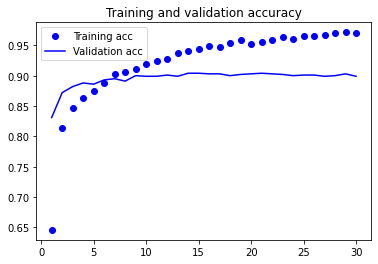

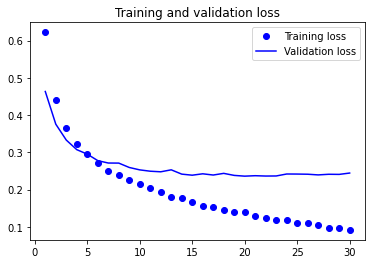

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#FEATURE EXTRACTION WITH DATA AUGMENTATION

In [ ]:
#Adding a densely connected classifier on top of the convolutional base

In [ ]:
from keras import models
from keras import layers

In [ ]:
#Build model

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Freezing

In [ ]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))



This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [ ]:
#Training the model end to end with a frozen convolutional base

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#compile

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [ ]:
#Fitting

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 663s 7s/step - loss: 0.5725 - acc: 0.7115 - val_loss: 0.4488 - val_acc: 0.8170
Epoch 2/30
100/100 [==============================] - 660s 7s/step - loss: 0.4766 - acc: 0.7790 - val_loss: 0.3428 - val_acc: 0.8640
Epoch 3/30
100/100 [==============================] - 660s 7s/step - loss: 0.4371 - acc: 0.7975 - val_loss: 0.2656 - val_acc: 0.8770
Epoch 4/30
100/100 [==============================] - 660s 7s/step - loss: 0.4038 - acc: 0.8230 - val_loss: 0.3644 - val_acc: 0.8630
Epoch 5/30
100/100 [==============================] - 659s 7s/step - loss: 0.3748 - acc: 0.8325 - val_loss: 0.2468 - val_acc: 0.8890
Epoch 6/30
100/100 [==============================] - 660s 7s/step - loss: 0.3650 - acc: 0.8405 - val_loss: 0.2771 - val_acc: 0.8840
Epoch 7/30
100/100 [==============================] - 660s 7s/step - loss: 0.3467 - acc: 0.8485 - val_loss: 0.2228 - val_acc: 0.8950
Epoch 8/30
100/100 [==============================] - 659s 7s/step - 

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

NameError: ignored

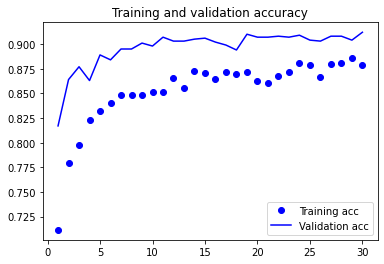

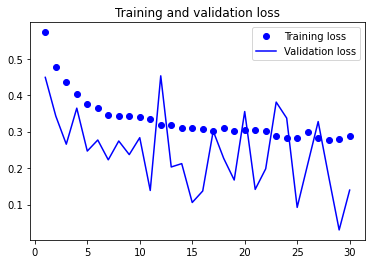

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('cats_and_dogs_small_4.h5')

In [ ]:
#FINE-TUNNING

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
#Freezing all layers up to a specific one

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
#Fine-tuning the model

In [ ]:
#compile

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

In [ ]:
#Fitting

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 803s 8s/step - loss: 0.2931 - acc: 0.8720 - val_loss: 0.2028 - val_acc: 0.9170
Epoch 2/100
100/100 [==============================] - 837s 8s/step - loss: 0.2584 - acc: 0.8960 - val_loss: 0.4885 - val_acc: 0.9140
Epoch 3/100
100/100 [==============================] - 899s 9s/step - loss: 0.2357 - acc: 0.8985 - val_loss: 0.3092 - val_acc: 0.9180
Epoch 4/100
100/100 [==============================] - 779s 8s/step - loss: 0.2294 - acc: 0.8955 - val_loss: 0.2523 - val_acc: 0.9210
Epoch 5/100
100/100 [==============================] - 774s 8s/step - loss: 0.2014 - acc: 0.9115 - val_loss: 0.3555 - val_acc: 0.9170
Epoch 6/100
100/100 [==============================] - 783s 8s/step - loss: 0.1989 - acc: 0.9175 - val_loss: 0.0203 - val_acc: 0.9160
Epoch 7/100
100/100 [==============================] - 771s 8s/step - loss: 0.1743 - acc: 0.9295 - val_loss: 0.4503 - val_acc: 0.9300
Epoch 8/100
100/100 [==============================] - 797s 8s